In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install sklearn
#!pip install seaborn
#!pip install ipywidgets widgetsnbextension IProgress pandas_profiling
#!!pip install catboost

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
data = pd.read_csv("models_v3.csv", na_values=['–','—', '-', 'None'])

# 1. Первичный анализ данных

### Вывод статистик по датасету

In [6]:
data.shape

(81774, 47)

In [7]:
data.head()

,URL,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Model_rank,Public_videos,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown
0,http://pornhub.com/model/mini-diva,Mini Diva,Hey there! You can call me Mini Diva. I love s...,820K,"364,041,175",11,1.0,65.0,7.0,107.0,0,1,1,0,26.0,NaN,"Aug 6, 1994",Czech Republic,NaN,NaN,NaN,"Heaven, Europe",NaN,White,NaN,NaN,No,NaN,Female,Brunette,"5' 6"" (167cm)",111lbs. (50kg),Guys and Girls,Boring AF.,2 years ago,35-25-36,Yes,NaN,"59,460,751",Single,NaN,No,Dunno what can turn me off.,"When you watching me, fucking love it!","364,041,175","1,057",Prague
1,http://pornhub.com/model/yinyleon,yinyleon,We will try to bring you the best fuck that we...,586K,"510,938,330",21,2.0,140.0,1.0,NaN,0,1,1,0,36.0,NaN,"Jun 1, 1984",NaN,NaN,NaN,NaN,"United states, United States",NaN,NaN,NaN,NaN,NaN,NaN,Couple,NaN,NaN,NaN,Guys and Girls,"I love to go to the gym, running, hiking, fuck...",1 year ago,NaN,NaN,NaN,"67,129,229",Taken,NaN,NaN,NaN,My biggest turn on is when I get my ass and pu...,"510,938,330","1,422",NaN
2,http://pornhub.com/model/crystal-lust,Crystal Lust,Cum see more of me on Onlyfans.com/LustCrystal...,433K,"346,726,146",29,4.0,104.0,69.0,173.0,0,1,1,0,24.0,NaN,"Oct 7, 1996",NaN,NaN,NaN,NaN,"Miami, United States",NaN,NaN,NaN,NaN,NaN,NaN,Female,Brunette,"5' 2"" (157cm)",NaN,Guys and Girls,NaN,1 year ago,42-32-50,NaN,NaN,"50,243,658",Taken,NaN,NaN,NaN,Getting fucked in the ass Onlyfans.com/LustCry...,"346,726,146",560,NaN
3,http://pornhub.com/model/solazola,Solazola,"Hi, guys) We hope that you LOVE SEX as much as...",748K,"234,093,027",32,5.0,50.0,14.0,181.0,0,1,0,0,21.0,NaN,"Dec 12, 1999",NaN,NaN,NaN,NaN,"Tallinn, Estonia",NaN,White,NaN,NaN,No,NaN,Couple,Brunette,"5' 8"" (172cm)",111lbs. (50kg),Guys and Girls,"Sport, snowboarding, movies, fashion, food, pl...",2 years ago,34-24-36,No,NaN,"56,041,576",Taken,NaN,Yes,NaN,blowjobs (love this action),"234,093,027","1,059",NaN
4,http://pornhub.com/model/dickforlily,DickForLily,just a couple who loves to fuck and gets off o...,596K,"357,380,610",43,7.0,175.0,23.0,17.0,0,1,0,0,22.0,NaN,"Oct 5, 1998",NaN,NaN,NaN,NaN,"New York, United States",NaN,White,NaN,NaN,No,NaN,Couple,Brunette,"5' 7"" (170cm)",117lbs. (53kg),Guys and Girls,"I love hiking, sucking dick, fucking and trave...",2 years ago,34-35-25,No,NaN,"44,344,938",Taken,NaN,No,avaricious and hypocritical people,"Men in suits , expensive cars , cute guys","357,380,610","3,391",NaN


In [8]:
data.describe()

,Pornhub_rank,Model_rank,Public_videos,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Born,Career Start and End,Career Status,Eye Color,Pornstar Profile Views,Star Sign
count,81774.000000,81610.000000,79561.000000,28760.000000,17517.000000,81774.0,81774.0,81774.000000,81774.000000,80229.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,56429.579463,41934.357946,13.392353,7.841620,23.928355,0.0,1.0,0.032651,0.000024,27.804073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,26974.421003,24732.503639,36.149875,35.140148,130.965379,0.0,0.0,0.177722,0.004945,26.484533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34496.250000,20816.250000,3.000000,1.000000,2.000000,0.0,1.0,0.000000,0.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,58344.500000,41406.500000,6.000000,2.000000,5.000000,0.0,1.0,0.000000,0.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,79600.750000,62285.750000,13.000000,4.000000,15.000000,0.0,1.0,0.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100240.000000,134458.000000,2910.000000,2268.000000,7570.000000,0.0,1.0,1.000000,1.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81774 entries, 0 to 81773
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   URL                     81774 non-null  object 
 1   Name                    81774 non-null  object 
 2   Bio                     58845 non-null  object 
 3   Subscribers             81774 non-null  object 
 4   Videos_views            81774 non-null  object 
 5   Pornhub_rank            81774 non-null  int64  
 6   Model_rank              81610 non-null  float64
 7   Public_videos           79561 non-null  float64
 8   Paid_videos             28760 non-null  float64
 9   Fan_club_material       17517 non-null  float64
 10  Verified_pornstar       81774 non-null  int64  
 11  Verified_member         81774 non-null  int64  
 12  Premium_user            81774 non-null  int64  
 13  Pornhub_awards_winner   81774 non-null  int64  
 14  Age                     80229 non-null

### Подготовка датасета (удаление NaN)

In [10]:
def first_value_less(na_stats_sorted, num):
    return [i for i, e in enumerate(list(na_stats_sorted.values)) if e <= num][0]

def find_persentage_of_nan(data):
    na_info = data.isnull()
    sum_na_info = na_info.sum()
    na_stats = sum_na_info / data.shape[0] * 100
    na_stats_sorted = na_stats.sort_values(ascending=False)
    return na_stats_sorted

In [11]:
# находим кол-во nan значений в даттасете в процентах
na_stats_sorted = find_persentage_of_nan(data)
na_stats_sorted

Eye Color                 100.000000
Career Status             100.000000
Career Start and End      100.000000
Star Sign                 100.000000
Pornstar Profile Views    100.000000
Born                      100.000000
Background                100.000000
Endowment                  92.031697
Facial Hair                91.450828
Foreskin                   91.361557
Measurements               90.323330
Hometown                   81.842639
Fan_club_material          78.578766
Fake Boobs                 76.016827
Turn Offs                  73.383961
Weight                     71.893267
Birthplace                 67.369824
Piercings                  66.903906
Interests and hobbies      65.940274
Height                     65.606427
Paid_videos                64.829897
Tattoos                    64.773644
Hair Color                 64.712500
Turn Ons                   62.426933
Ethnicity                  60.346809
City and Country           30.947489
Bio                        28.039475
I

Удаляем столбцы, в которых пропущенных значений больше 25%

In [12]:
persentage = 25
columns_for_drop = list(na_stats_sorted.index)[:first_value_less(na_stats_sorted, persentage)]
print("Columns for drop:")
print(columns_for_drop)

data_pre = data.drop(columns_for_drop, axis = 1)

Columns for drop:
['Eye Color', 'Career Status', 'Career Start and End', 'Star Sign', 'Pornstar Profile Views', 'Born', 'Background', 'Endowment', 'Facial Hair', 'Foreskin', 'Measurements', 'Hometown', 'Fan_club_material', 'Fake Boobs', 'Turn Offs', 'Weight', 'Birthplace', 'Piercings', 'Interests and hobbies', 'Height', 'Paid_videos', 'Tattoos', 'Hair Color', 'Turn Ons', 'Ethnicity', 'City and Country', 'Bio']


In [13]:
# снова выводим проценты
na_stats_sorted = find_persentage_of_nan(data_pre)
na_stats_sorted

Interested in            6.259936
Public_videos            2.706239
Birthday                 1.913811
Age                      1.889354
Videos Watched           0.769193
Relationship status      0.741067
Video Views              0.272703
Model_rank               0.200553
Gender                   0.003669
Profile Views            0.000000
Joined                   0.000000
URL                      0.000000
Name                     0.000000
Premium_user             0.000000
Verified_member          0.000000
Verified_pornstar        0.000000
Pornhub_rank             0.000000
Videos_views             0.000000
Subscribers              0.000000
Pornhub_awards_winner    0.000000
dtype: float64

Теперь удаляем строчки, в которых есть пропущенные значения.

Так как их суммарно меньше 10%, то мы просто их удаляем, а не заполняем.

In [14]:
persentage = 0
columns_for_dropna = list(na_stats_sorted.index)[:first_value_less(na_stats_sorted, persentage)]
print("Columns for dropna:")
print(columns_for_dropna)

data_pre = data_pre.dropna(subset=columns_for_dropna)

Columns for dropna:
['Interested in', 'Public_videos', 'Birthday', 'Age', 'Videos Watched', 'Relationship status', 'Video Views', 'Model_rank', 'Gender']


In [15]:
# удаляем столбец "URL" так как он не несет за собой смысловой значимости
data_pre = data_pre.drop(["URL"], axis=1)

In [16]:
# делаем последний поиск nan значений
find_persentage_of_nan(data_pre)

Name                     0.0
Age                      0.0
Video Views              0.0
Relationship status      0.0
Profile Views            0.0
Joined                   0.0
Interested in            0.0
Gender                   0.0
Birthday                 0.0
Pornhub_awards_winner    0.0
Subscribers              0.0
Premium_user             0.0
Verified_member          0.0
Verified_pornstar        0.0
Public_videos            0.0
Model_rank               0.0
Pornhub_rank             0.0
Videos_views             0.0
Videos Watched           0.0
dtype: float64

In [17]:
data_pre_copy = data_pre.copy()

### Производим препроцессинг

In [18]:
from sklearn import preprocessing

In [19]:
encoders = {}
for c in data_pre.columns:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(data_pre[c])
    data_pre[c] = encoder.transform(data_pre[c])
    encoders[c] = encoder
    

### Рисуем графики

In [20]:
import pandas_profiling

In [21]:
import seaborn as sns

<AxesSubplot:>

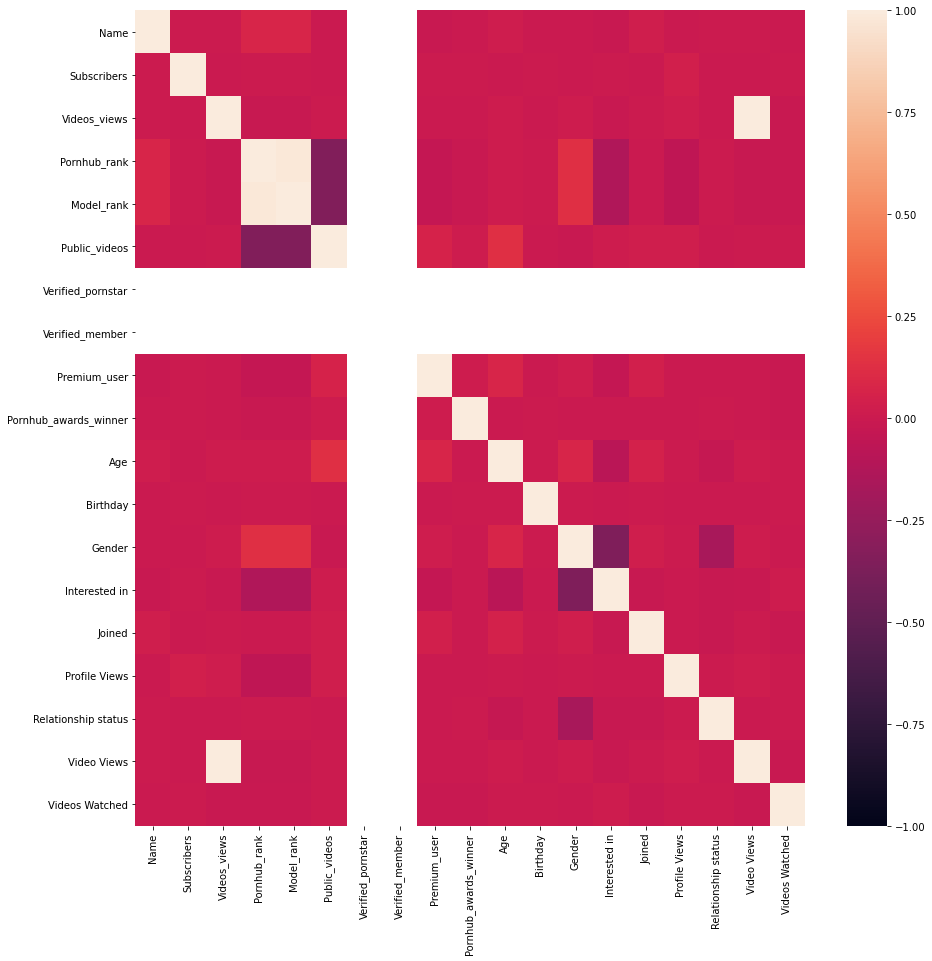

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_pre.corr(), fmt="f", vmin=-1, vmax=1, ax=ax)

In [23]:
data_pre.corr()

,Name,Subscribers,Videos_views,Pornhub_rank,Model_rank,Public_videos,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Birthday,Gender,Interested in,Joined,Profile Views,Relationship status,Video Views,Videos Watched
Name,1.000000,0.000387,0.004373,0.075488,0.073779,-0.004221,NaN,NaN,-0.012272,-0.003627,0.016945,-0.004122,-0.003181,-0.014771,0.027371,-0.007033,0.007687,0.004373,-0.004905
Subscribers,0.000387,1.000000,-0.001540,0.002370,0.003129,-0.006393,NaN,NaN,0.001039,0.000819,-0.002183,0.002300,-0.000910,0.003039,-0.002127,0.032750,-0.002647,-0.001540,0.000855
Videos_views,0.004373,-0.001540,1.000000,-0.016000,-0.016177,0.001795,NaN,NaN,-0.001428,-0.000557,0.009822,-0.000695,0.008960,-0.008392,0.001848,0.020267,-0.004213,1.000000,-0.010864
Pornhub_rank,0.075488,0.002370,-0.016000,1.000000,0.981611,-0.344025,NaN,NaN,-0.035853,-0.009066,0.010829,0.003374,0.129758,-0.130988,-0.002019,-0.058220,0.000113,-0.016000,-0.010112
Model_rank,0.073779,0.003129,-0.016177,0.981611,1.000000,-0.346085,NaN,NaN,-0.036026,-0.009026,0.009198,0.003012,0.128241,-0.128163,-0.003227,-0.059732,0.002649,-0.016177,-0.011300
Public_videos,-0.004221,-0.006393,0.001795,-0.344025,-0.346085,1.000000,NaN,NaN,0.054832,0.011962,0.125553,-0.007104,-0.012580,0.010956,0.028500,0.030359,-0.004410,0.001795,0.003091
Verified_pornstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Verified_member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Premium_user,-0.012272,0.001039,-0.001428,-0.035853,-0.036026,0.054832,NaN,NaN,1.000000,0.013469,0.075071,-0.002286,0.019916,-0.035678,0.032833,-0.004701,-0.000443,-0.001428,-0.010237
Pornhub_awards_winner,-0.003627,0.000819,-0.000557,-0.009066,-0.009026,0.011962,NaN,NaN,0.013469,1.000000,-0.004236,0.007208,-0.003894,-0.001788,-0.002612,-0.001050,0.002612,-0.000557,-0.009070


В данной таблице кореляции есть таблицы которые имеют только 1 вариант значения и изза того что в формуле вычисления кореляции есть деление на (n-1) в следствии чего у нас появляется деление на 0 и мы получаем NaN.

Также удаляем столбец "Video Views" так как у него кореляция со столбцом "Video_views" равна 1.

In [24]:
bad_columns = ["Video Views", "Verified_pornstar", "Verified_member"]

In [25]:
data_pre = data_pre.drop(bad_columns, axis = 1)

# 2 Модели

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Y = data_pre["Gender"]

In [28]:
X = data_pre.drop(["Gender"], axis=1)

In [29]:
x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.33, random_state=2021)

In [30]:
target_names = encoders['Gender'].inverse_transform(sorted(data_pre['Gender'].unique()))

<AxesSubplot:xlabel='genders', ylabel='amount of entries'>

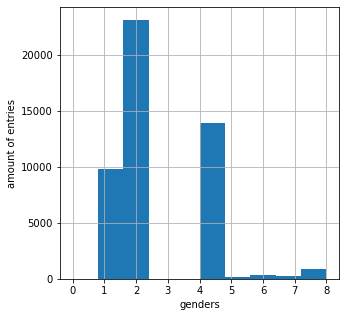

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("genders")
ax.set_ylabel("amount of entries")
y_train.hist(ax=ax)

<AxesSubplot:xlabel='genders', ylabel='amount of entries'>

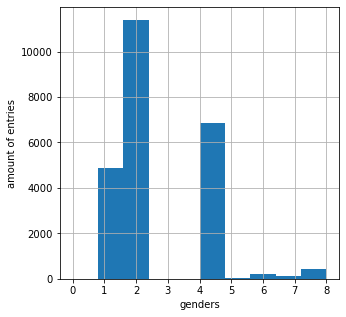

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("genders")
ax.set_ylabel("amount of entries")
y_test.hist(ax=ax)

### KNN

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=100)

In [36]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [37]:
predicted = knn.predict(x_test)

In [38]:
accuracy_score(y_test, predicted)

0.4880086905657224

In [39]:
target_names = encoders['Gender'].inverse_transform(sorted(data_pre['Gender'].unique()))

In [40]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.42      0.01      0.01      4889
      Female       0.49      0.90      0.64     11393
       Group       0.00      0.00      0.00         1
        Male       0.45      0.21      0.28      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.49     23934
   macro avg       0.15      0.12      0.10     23934
weighted avg       0.45      0.49      0.39     23934



In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

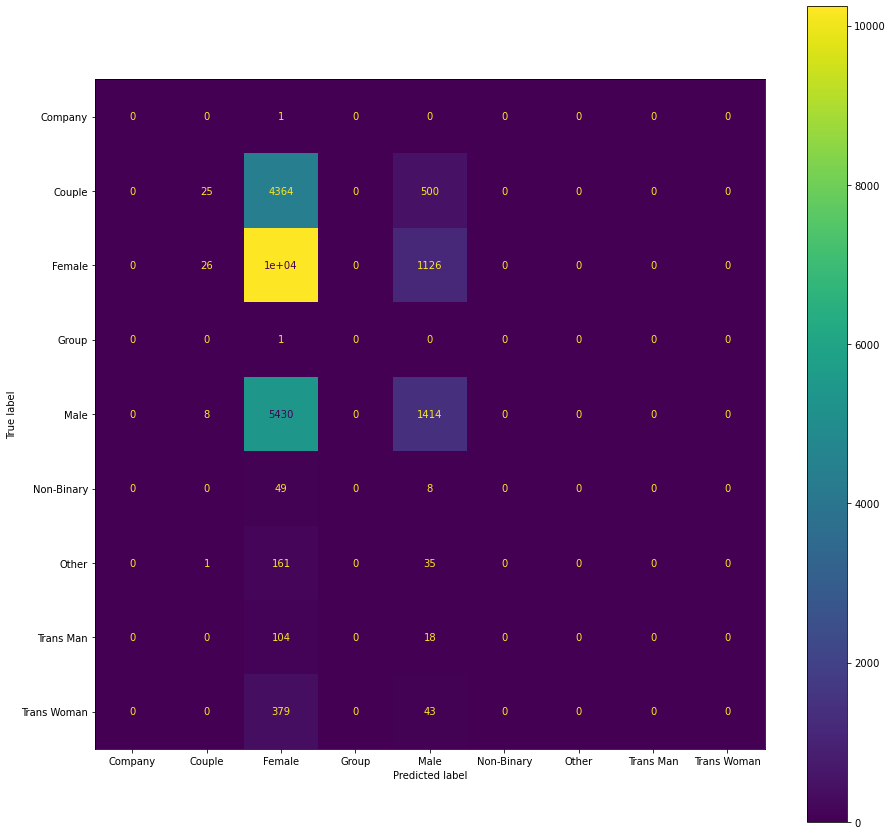

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, ax=ax, display_labels=target_names)
cm

In [43]:
def plot_acc(x_ax, y_ax, x_label):
    plt.plot(x_ax, y_ax)
    plt.xlabel(x_label)
    plt.ylabel('mean_test_score')

In [44]:
n_neighbors = np.arange(10, 20, 5)
knn_grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': n_neighbors})

In [45]:
knn_grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 15])})

In [46]:
cv_res = knn_grid.cv_results_['mean_test_score']

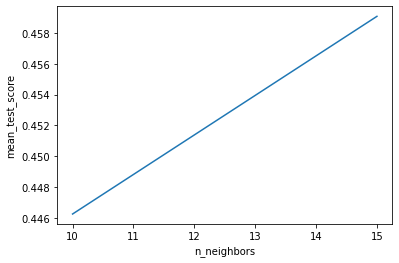

In [47]:
plot_acc(n_neighbors, cv_res, 'n_neighbors')

In [48]:
predicted = knn_grid.predict(x_test)

In [49]:
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.26      0.11      0.15      4889
      Female       0.50      0.77      0.60     11393
       Group       0.00      0.00      0.00         1
        Male       0.40      0.26      0.31      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.46     23934
   macro avg       0.13      0.13      0.12     23934
weighted avg       0.40      0.46      0.41     23934



### RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest = RandomForestClassifier(max_depth=40, random_state=0)

In [52]:
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, random_state=0)

In [53]:
predicted = forest.predict(x_test)

In [54]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.54      0.39      0.45      4889
      Female       0.70      0.88      0.78     11393
       Group       0.00      0.00      0.00         1
        Male       0.79      0.71      0.75      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.70     23934
   macro avg       0.23      0.22      0.22     23934
weighted avg       0.67      0.70      0.68     23934



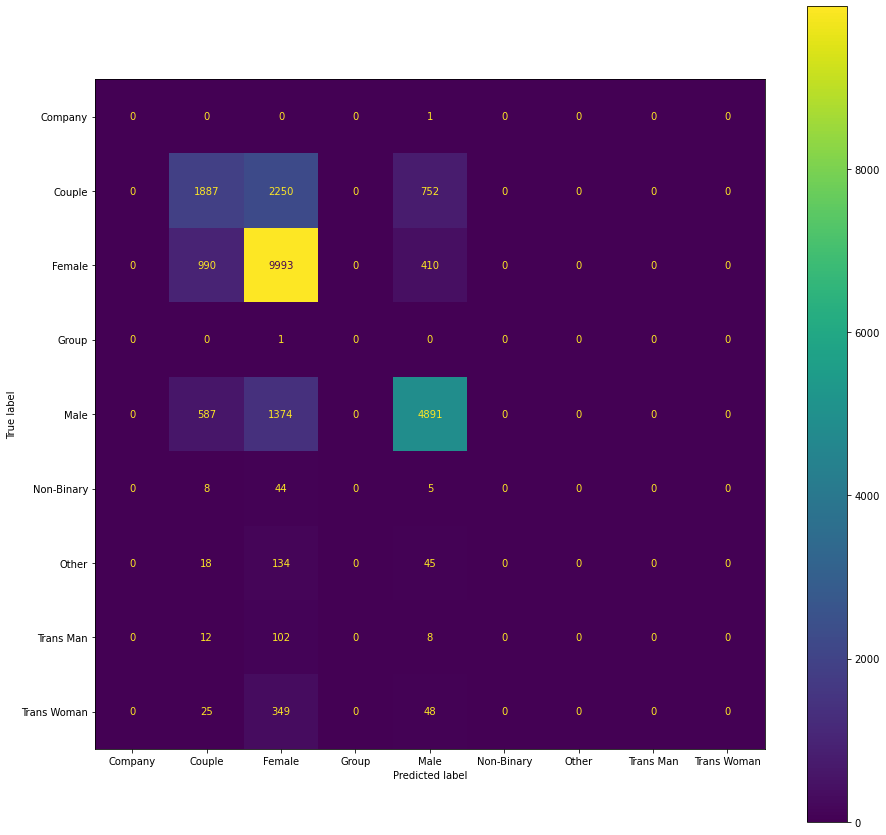

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test, ax=ax, display_labels=target_names)
cm

In [56]:
max_depth = np.arange(1, 3)
forest_grid = GridSearchCV(RandomForestClassifier(random_state=0), {'max_depth': max_depth})

In [57]:
forest_grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': array([1, 2])})

In [58]:
predicted = forest_grid.predict(x_test)

In [59]:
forest_grid.cv_results_

{'mean_fit_time': array([0.77884402, 1.17344561]),
 'std_fit_time': array([0.02003062, 0.02297382]),
 'mean_score_time': array([0.03780341, 0.04235554]),
 'std_score_time': array([0.00161243, 0.00054563]),
 'param_max_depth': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1}, {'max_depth': 2}],
 'split0_test_score': array([0.61055664, 0.66910176]),
 'split1_test_score': array([0.62265898, 0.66567195]),
 'split2_test_score': array([0.6405639 , 0.66978802]),
 'split3_test_score': array([0.61061947, 0.67040543]),
 'split4_test_score': array([0.62605474, 0.66958222]),
 'mean_test_score': array([0.62209075, 0.66890988]),
 'std_test_score': array([0.01115275, 0.00167218]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [60]:
cv_res = forest_grid.cv_results_['mean_test_score']

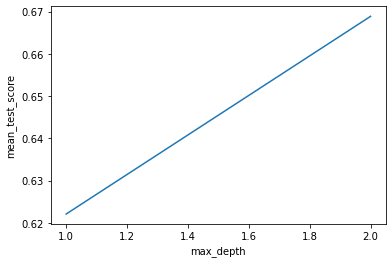

In [61]:
plot_acc(max_depth, cv_res, "max_depth")

In [62]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.00      0.00      0.00      4889
      Female       0.63      0.96      0.76     11393
       Group       0.00      0.00      0.00         1
        Male       0.76      0.73      0.75      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.67     23934
   macro avg       0.15      0.19      0.17     23934
weighted avg       0.52      0.67      0.58     23934



### DecisionTree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

In [65]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [66]:
predicted = tree.predict(x_test)

In [67]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.50      0.33      0.40      4889
      Female       0.68      0.88      0.77     11393
       Group       0.00      0.00      0.00         1
        Male       0.81      0.68      0.74      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.68     23934
   macro avg       0.22      0.21      0.21     23934
weighted avg       0.66      0.68      0.66     23934



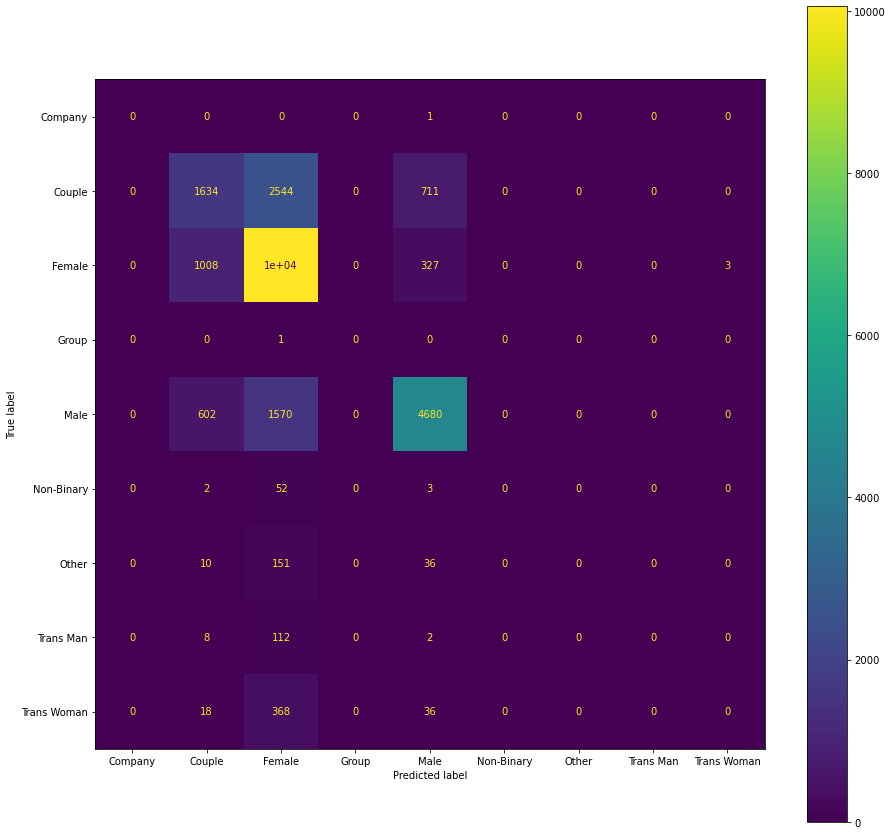

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(tree, x_test, y_test, ax=ax, display_labels=target_names)
cm

In [69]:
max_depth = np.arange(1, 3)
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), {'max_depth':max_depth} )

In [70]:
tree_grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': array([1, 2])})

In [71]:
predicted = tree_grid.predict(x_test)

In [72]:
cv_res = tree_grid.cv_results_['mean_test_score']

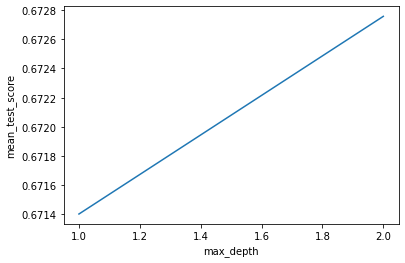

In [73]:
plot_acc(max_depth, cv_res, "max_depth")

In [74]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.45      0.19      0.27      4889
      Female       0.65      0.96      0.77     11393
       Group       0.00      0.00      0.00         1
        Male       0.86      0.62      0.72      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.67     23934
   macro avg       0.22      0.20      0.20     23934
weighted avg       0.64      0.67      0.63     23934



### GaussianNB

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
gauss = GaussianNB(var_smoothing=0.00000000001)

In [77]:
gauss.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-11)

In [78]:
predicted = gauss.predict(x_test)

In [79]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.47      0.11      0.18      4889
      Female       0.65      0.89      0.75     11393
       Group       0.00      0.00      0.00         1
        Male       0.72      0.72      0.72      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.01      0.01      0.01       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.65     23934
   macro avg       0.21      0.19      0.18     23934
weighted avg       0.61      0.65      0.60     23934



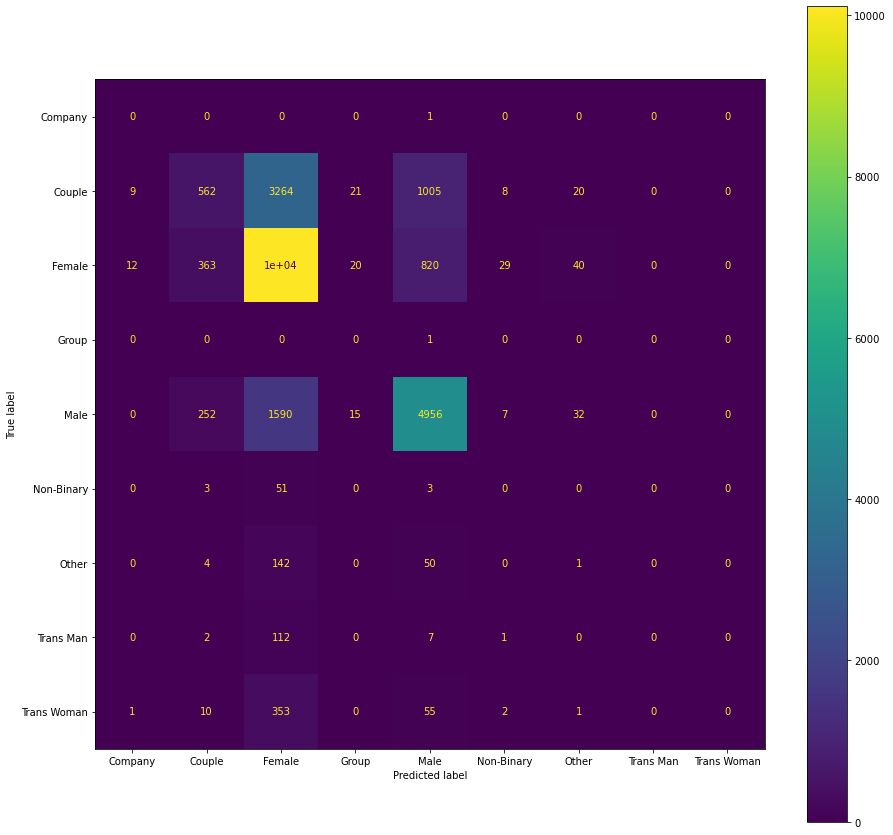

In [80]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(gauss, x_test, y_test, ax=ax, display_labels=target_names)
cm

In [81]:
var_smoothing = np.arange(0.00000000001, 0.00000000003, 0.00000000001)
gauss_grid = GridSearchCV(GaussianNB(), {'var_smoothing':var_smoothing})

In [82]:
gauss_grid.fit(x_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e-11, 2.e-11, 3.e-11])})

In [83]:
predicted = gauss_grid.predict(x_test)

In [84]:
cv_res = gauss_grid.cv_results_['mean_test_score']

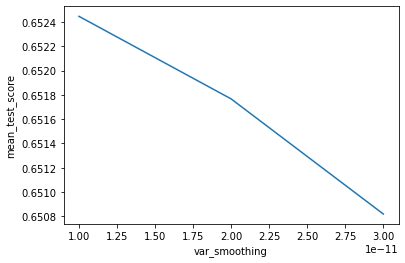

In [85]:
plot_acc(var_smoothing, cv_res, "var_smoothing")

In [86]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.47      0.11      0.18      4889
      Female       0.65      0.89      0.75     11393
       Group       0.00      0.00      0.00         1
        Male       0.72      0.72      0.72      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.01      0.01      0.01       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.65     23934
   macro avg       0.21      0.19      0.18     23934
weighted avg       0.61      0.65      0.60     23934



### LogisticRegression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logreg = LogisticRegression()

In [89]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [90]:
predicted = logreg.predict(x_test)

In [91]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.00      0.00      0.00      4889
      Female       0.48      0.92      0.63     11393
       Group       0.00      0.00      0.00         1
        Male       0.38      0.12      0.18      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.47     23934
   macro avg       0.10      0.11      0.09     23934
weighted avg       0.34      0.47      0.35     23934



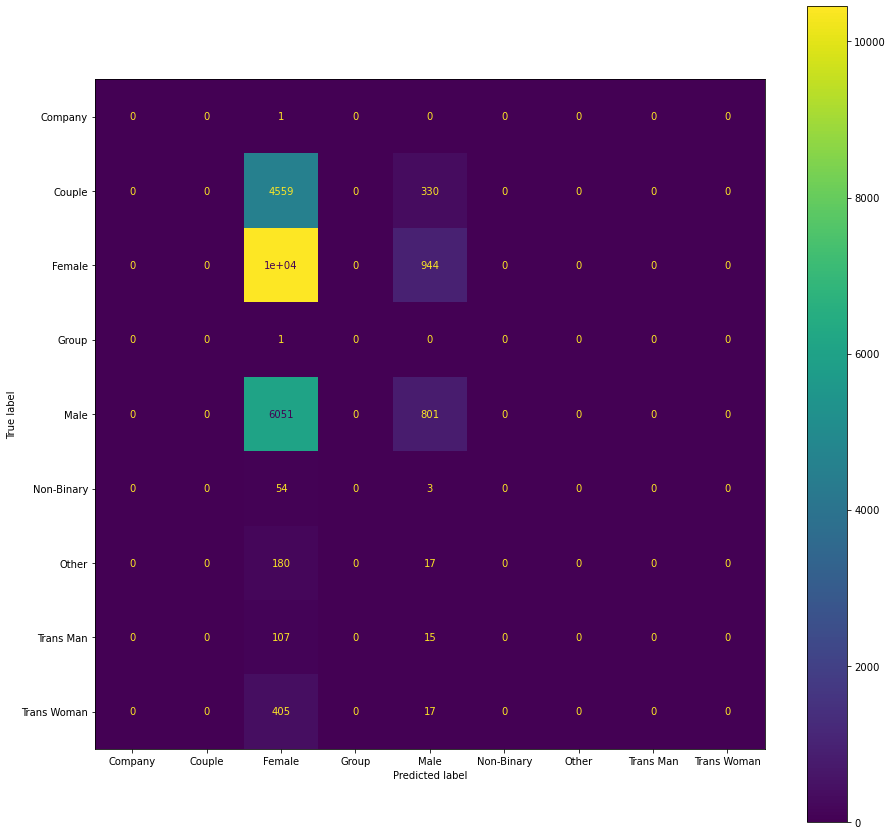

In [92]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test, ax=ax, display_labels=target_names)
cm

In [93]:
C = np.arange(0.5, 1.5, 0.5)
logreg_grid = GridSearchCV(LogisticRegression(), {'C':C})

In [94]:
logreg_grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 1. ])})

In [95]:
predicted = logreg_grid.predict(x_test)

In [96]:
cv_res = logreg_grid.cv_results_['mean_test_score']

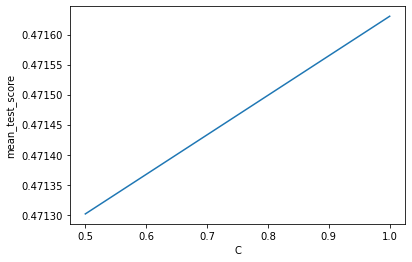

In [97]:
plot_acc(C, cv_res, 'C')

In [98]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.00      0.00      0.00      4889
      Female       0.48      0.92      0.63     11393
       Group       0.00      0.00      0.00         1
        Male       0.38      0.12      0.18      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.47     23934
   macro avg       0.10      0.11      0.09     23934
weighted avg       0.34      0.47      0.35     23934



### CatBoost (Бустим кота)

In [99]:
from catboost import CatBoostClassifier

In [100]:
catboost = CatBoostClassifier(iterations=3, depth=5, learning_rate=0.595)

In [101]:
catboost.fit(x_train, y_train)

0:	learn: 1.0142570	total: 87.8ms	remaining: 176ms
1:	learn: 0.9052453	total: 103ms	remaining: 51.6ms
2:	learn: 0.8533963	total: 119ms	remaining: 0us


In [102]:
predicted = catboost.predict(x_test)

In [103]:
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.49      0.35      0.41      4889
      Female       0.68      0.86      0.76     11393
       Group       0.00      0.00      0.00         1
        Male       0.79      0.69      0.73      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.68     23934
   macro avg       0.22      0.21      0.21     23934
weighted avg       0.65      0.68      0.66     23934



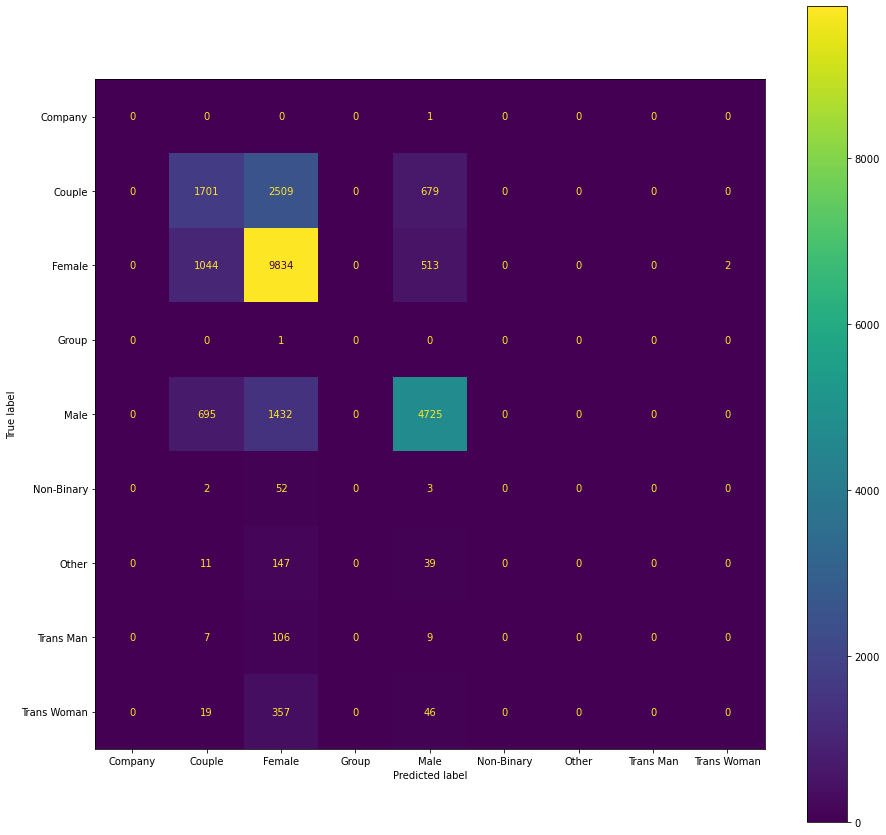

In [104]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(catboost, x_test, y_test, ax=ax, display_labels=target_names)
cm

In [105]:
iterations = np.arange(2, 4)
depth = np.arange(4, 6)
catboost_grid = GridSearchCV(CatBoostClassifier(), {'iterations':iterations, 'depth':depth})

In [106]:
catboost_grid.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 1.0361697	total: 14.9ms	remaining: 14.9ms
1:	learn: 0.9156309	total: 27.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0305976	total: 12.1ms	remaining: 12.1ms
1:	learn: 0.9075953	total: 22ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0345524	total: 12.7ms	remaining: 12.7ms
1:	learn: 0.9119021	total: 23.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0358902	total: 13ms	remaining: 13ms
1:	learn: 0.9126627	total: 24.9ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0354144	total: 11ms	remaining: 11ms
1:	learn: 0.9148050	total: 21.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0361697	total: 9.1ms	remaining: 18.2ms
1:	learn: 0.9156309	total: 21ms	remaining: 10.5ms
2:	learn: 0.8727403	total: 30.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0305976	total: 9.47ms	remaining: 18.9ms
1:	learn: 0.9075953	total: 19.7ms	remaining: 9.83ms
2:	learn: 0.8648692	total: 28.7ms	remaining: 0us
Learning rate set to 0.5
0:

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x190300460>,
             param_grid={'depth': array([4, 5]), 'iterations': array([2, 3])})

In [107]:
predicted = catboost_grid.predict(x_test)

In [108]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.51      0.25      0.33      4889
      Female       0.67      0.92      0.77     11393
       Group       0.00      0.00      0.00         1
        Male       0.80      0.68      0.74      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.68     23934
   macro avg       0.22      0.21      0.20     23934
weighted avg       0.65      0.68      0.65     23934

